In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from copy import copy

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'
datadir2 = '/scratch/dlobelle/Kooi_data/data_output/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [43]:
region = ['EqPac', 'NPSG']
mortality = 0.39              # [d-1]
runtime = 10                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'markov_0_KPP_reflect_tidal'
sizebinedges = [1e-3, 0.5e-3, 1e-4, 1e-5, 1e-6]

In [44]:
ds_0 = xr.open_dataset(datadir+'regional_'+region[0]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region[1]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [45]:
dslist = [ds_0, ds_1]

In [46]:
times = ds_0['time'][0,:].astype('O')
timelabels = ds_0['time'][0,:].dt.strftime('%Y-%m-%d')

In [47]:
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue']
region_cmap = ['teal', 'darkorange']

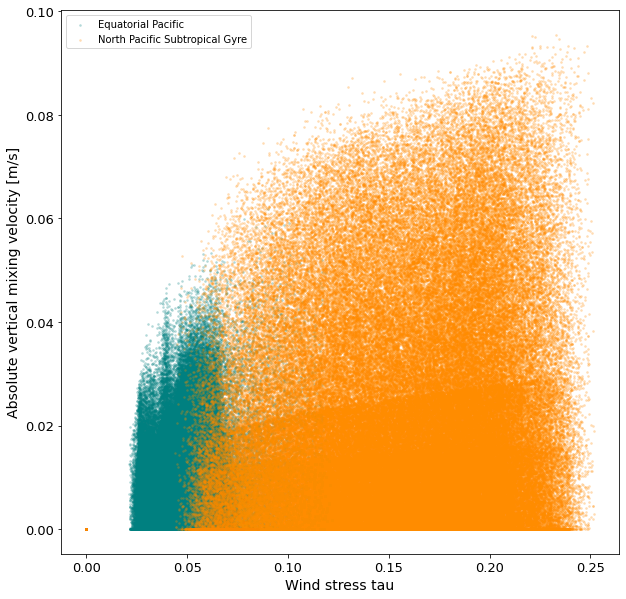

In [50]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['tau'], np.abs(ds['w_m']), c= region_cmap[i], s=3, alpha=0.2,label=regions[region[i]])
ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Absolute vertical mixing velocity [m/s]', fontsize=14)
ax.set_xlabel('Wind stress tau', fontsize=14)
ax.legend(loc='upper left')

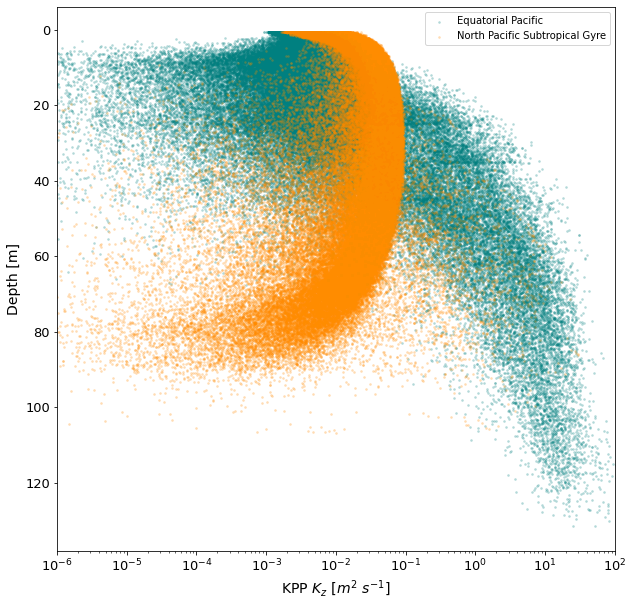

In [53]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['KPP'], ds['z'], c= region_cmap[i], s=3, alpha=0.2,label=regions[region[i]])
ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_xlabel('KPP $K_{z}$ [$m^{2}$ $s^{-1}$]', fontsize=14)
ax.set_xscale('log')
ax.set_xlim(1e-6,1e2)
ax.invert_yaxis()
ax.legend(loc='upper right')

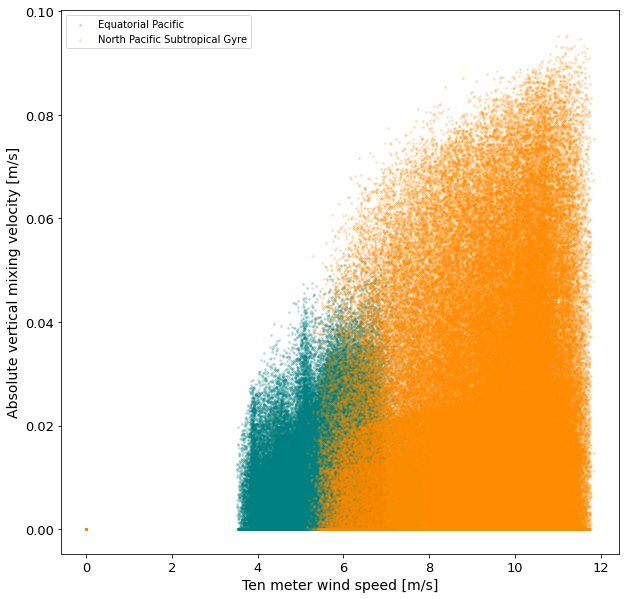

In [56]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['w10'], np.abs(ds['w_m']), c= region_cmap[i], s=3, alpha=0.2,label=regions[region[i]])
ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Absolute vertical mixing velocity [m/s]', fontsize=14)
ax.set_xlabel('Ten meter wind speed [m/s]', fontsize=14)
ax.legend(loc='upper left')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


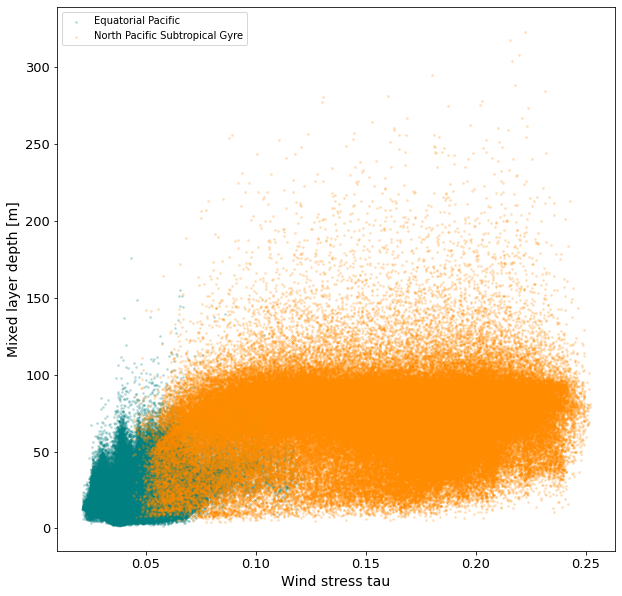

In [57]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['tau'], np.abs(np.divide(ds['z'],ds['mld'])), c= region_cmap[i], s=3, alpha=0.2,label=regions[region[i]])
ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Mixed layer depth [m]', fontsize=14)
ax.set_xlabel('Wind stress tau', fontsize=14)
ax.legend()

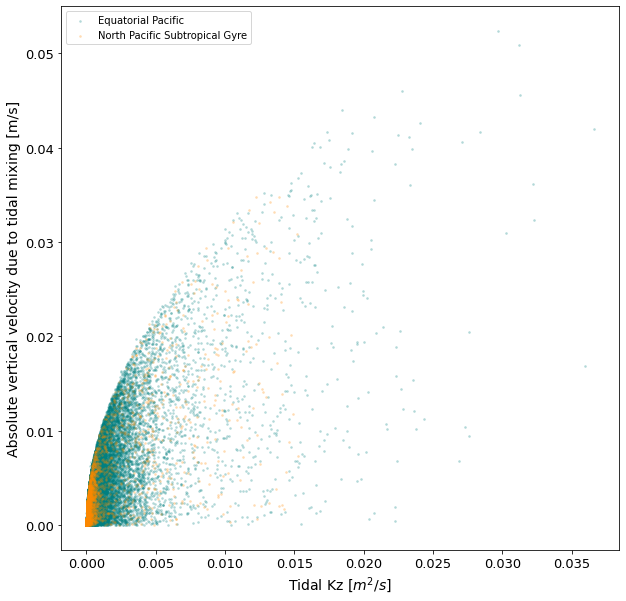

In [58]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['K_z_t'], np.abs(ds['w_m_b']), c= region_cmap[i], s=3, alpha=0.2,label=regions[region[i]])
ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Absolute vertical velocity due to tidal mixing [m/s]', fontsize=14)
ax.set_xlabel('Tidal Kz [$m^{2}/s$]', fontsize=14)
ax.legend()

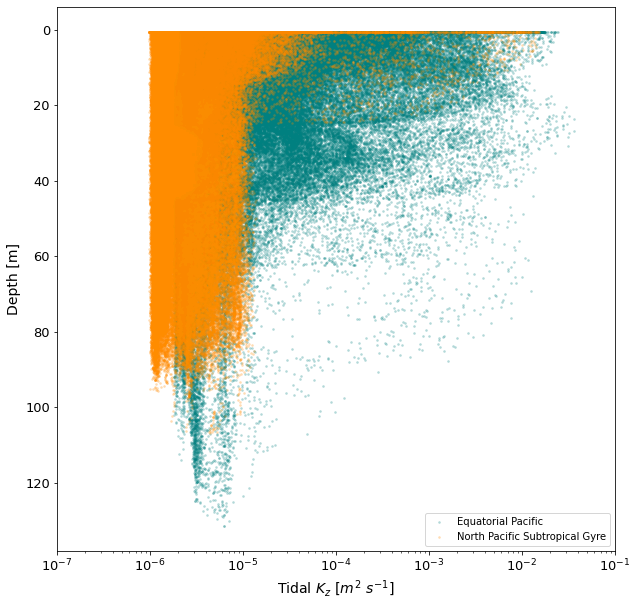

In [61]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['K_z_t'], ds['z'], c= region_cmap[i], s=3, alpha=0.2,label=regions[region[i]])
ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_xlabel('Tidal $K_z$ [$m^{2}$ $s^{-1}$]', fontsize=14)
ax.set_xscale('log')
ax.set_xlim(1e-7,1e-1)
ax.legend(loc='lower right')
ax.invert_yaxis()